<a href="https://colab.research.google.com/github/KrishnaPrasanna21/IPL_Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
matchdf = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
balldf = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
matchdf.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [8]:
matchdf.shape

(950, 20)

In [9]:
matchdf.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [10]:
matchdf[matchdf['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [11]:
matchdf.drop(['City','ID','method'],axis=1,inplace=True)

In [12]:
matchdf=matchdf.dropna()

In [13]:
balldf.shape

(225954, 17)

In [14]:
balldf.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [15]:
batgroup=balldf.groupby(['batter'])
batdf=pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_faced'})

batdf['innings']=batgroup['innings'].nunique()
batdf['runs'] = batgroup['batsman_run'].sum()

batdf['0s'] = balldf[balldf['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batdf['0s'].fillna(0,inplace=True)

batdf['1s'] = balldf[balldf['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batdf['1s'].fillna(0,inplace=True)

batdf['2s'] = balldf[balldf['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batdf['2s'].fillna(0,inplace=True)

batdf['3s'] = balldf[balldf['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batdf['3s'].fillna(0,inplace=True)

batdf['4s'] = balldf[balldf['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batdf['4s'].fillna(0,inplace=True)

batdf['6s'] = balldf[balldf['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batdf['6s'].fillna(0,inplace=True)

batdf['player_out']=batgroup['player_out'].count()

In [16]:
batdf['bat_average'] = round(batdf['runs']/batdf['player_out'],2)
batdf['bat_average'].fillna(0,inplace=True)
batdf['bat_strike'] = round(batdf['runs']/batdf['balls_faced']*100,2)
batdf['bat_strike'].fillna(0,inplace=True)

In [17]:
batdf.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [18]:
bowlgroup = balldf.groupby(['bowler'])


bowldf = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_bowled'})


bwl_wkts = balldf[balldf['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowldf['wickets'] = bwl_wkts.groupby(['bowler'])['ballnumber'].count()
bowldf['wickets'].fillna(0,inplace=True)

bowldf['overs'] = round(bowldf['balls_bowled']/6)

bowldf['runs_conceded'] = balldf.groupby('bowler')['batsman_run'].sum()
bowldf['runs_conceded'] = bowldf['runs_conceded'].fillna(0)

bowldf['runs_conceded'] = bowldf['runs_conceded'].add(balldf[balldf['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

<Axes: >

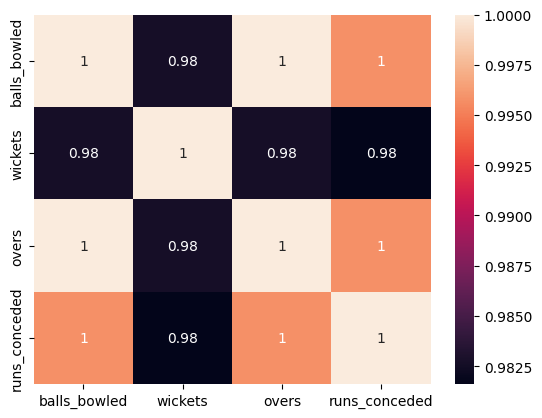

In [19]:
sns.heatmap(bowldf.corr(),annot=True)

In [20]:
def update_player_with_match(player_name, id):
    if player_name in all_players_dict:
        all_players_dict[player_name].add(id)
    else:
        all_players_dict[player_name] = {id}

# Consider players listed as batsman, non striker or bowler
def update_player_list(x):
    update_player_with_match(x['batter'],x['ID'])
    update_player_with_match(x['non-striker'],x['ID'])
    update_player_with_match(x['bowler'],x['ID'])

In [21]:
all_players_dict = {}
out_temp = balldf.apply(lambda x: update_player_list(x),axis=1)
all_df = pd.DataFrame({'Players':list(all_players_dict.keys())})
all_df['matches'] = all_df['Players'].apply(lambda x: len(all_players_dict[x]))
all_df=all_df.set_index('Players')

In [22]:
players = pd.merge(all_df,batdf, left_index=True, right_index=True,how='outer')
players = pd.merge(players,bowldf, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [23]:
catches_cb = balldf[(balldf['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
catches_c = balldf[(balldf['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catches_df = pd.merge(catches_cb,catches_c, left_index=True, right_index=True,how='outer')
catches_df.fillna(0,inplace=True)
catches_df['catches'] = catches_df['bowler_catches']+catches_df['fielder_catches']
catches_df.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

players = pd.merge(players,catches_df, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [24]:
players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,catches
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,9.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,9.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,7.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,2.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,0.0


In [25]:
players = pd.merge(players,matchdf['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
players['Player_of_Match']  = players[['Player_of_Match']].fillna(0)

In [26]:
players[['Player_of_Match']]

,Player_of_Match
A Ashish Reddy,0.0
A Badoni,0.0
A Chandila,1.0
A Chopra,0.0
A Choudhary,0.0
...,...
Yash Dayal,0.0
Yashpal Singh,0.0
Younis Khan,0.0
Yuvraj Singh,5.0


In [27]:
all_players=players.copy()
players_columns=players.columns

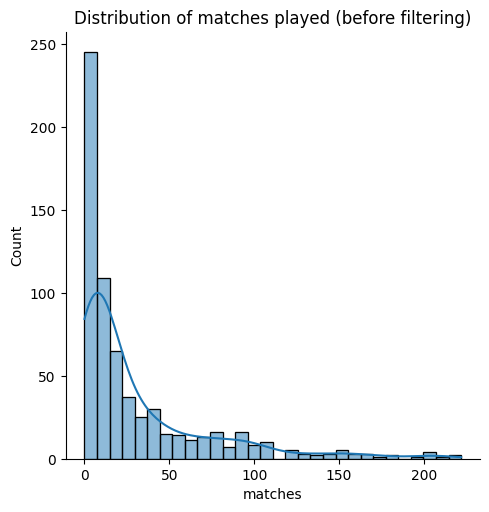

In [28]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (before filtering)')
plt.show()

In [29]:
players.shape

(656, 19)

In [30]:
CUTOFF_MATCHES = 10
players=players[players['matches']>=CUTOFF_MATCHES]

In [31]:
players.shape

(370, 19)

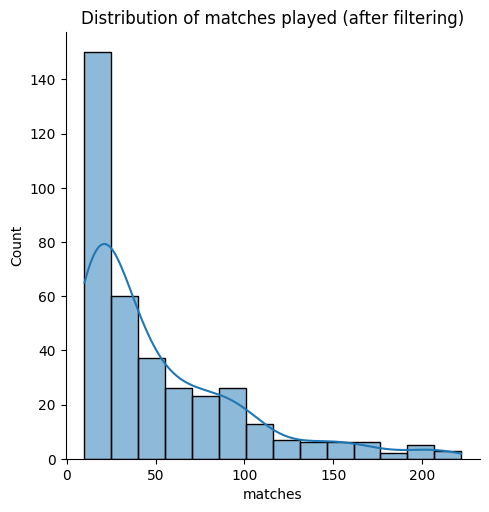

In [32]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (after filtering)')
plt.show()

<Axes: >

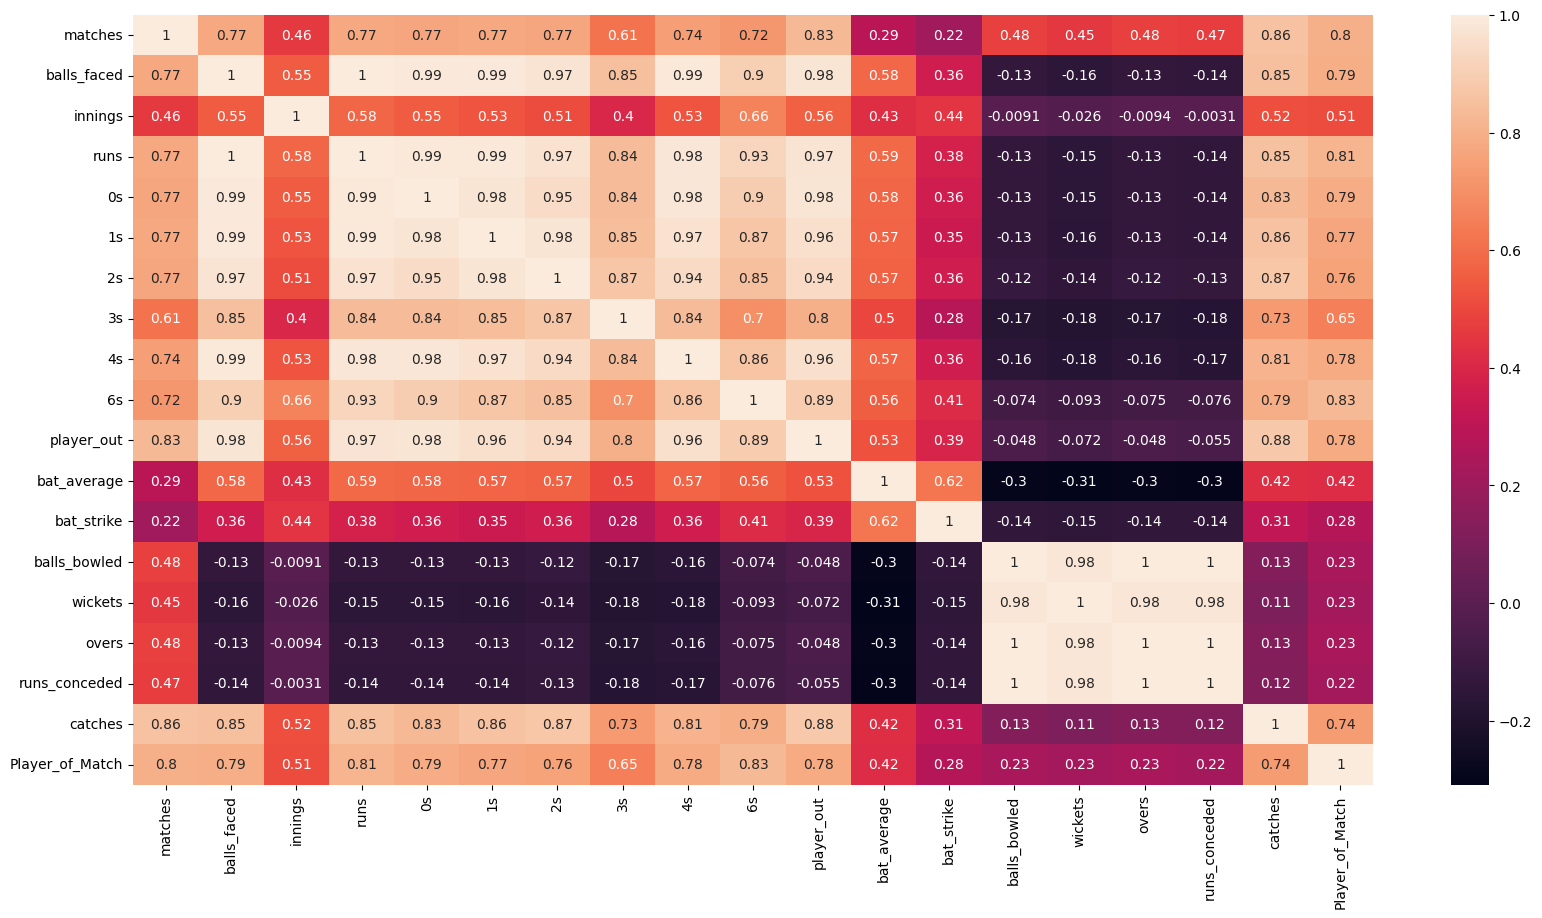

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(players.corr(),annot=True)

In [34]:
def correlation(data,threshold):
    col_corr=set() #set to avoid duplicate values
    corr_matrix=players.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features=correlation(players,0.8)
corr_features

{'0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'catches',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'}

In [36]:
players_classified=players.drop(['0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'],axis=1)

In [37]:
players_new = players_classified[np.isfinite(players_classified).all(1)]

In [38]:
scaler=StandardScaler()

players_scaled=pd.DataFrame(scaler.fit_transform(players_new),columns=players_classified.columns)
players_scaled=players_scaled.set_index(players_new.index)
players_scaled.head()

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,catches
A Ashish Reddy,-0.514335,-0.436306,-0.183525,0.015286,1.133442,-0.399308,-0.436396
A Badoni,-0.886428,-0.498461,-0.183525,-0.057052,0.240973,-0.735814,-0.436396
A Chandila,-0.864541,-0.642400,-2.097434,-1.345217,-1.696839,-0.446262,-0.528282
A Kumble,-0.207905,-0.596601,-0.183525,-0.093221,-1.225016,0.530648,-0.390453
A Mishra,2.243536,-0.202951,-0.183525,-0.596801,-0.668336,3.574851,0.114921


In [39]:
k_range=range(1,12)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(players_scaled)
    sse.append(km.inertia_)
sse

[2554.999999999999,
 1681.1406155954392,
 1293.3059138171077,
 1031.1018226586596,
 886.8776471055131,
 789.8184102919679,
 725.442044379875,
 657.8025975471653,
 595.3589414853727,
 558.3708741106709,
 526.4033648293714]

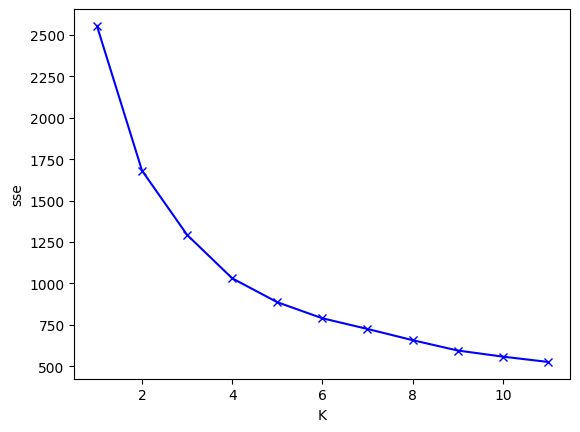

In [40]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse,'bx-')

In [41]:
km = KMeans(n_clusters=5)
y_pred=km.fit_predict(players_scaled)
players_new['cluster']=y_pred

In [42]:
top_players=players_new.loc[players_new['matches']>50]

In [43]:
top_players.reset_index(inplace=True)
top_players = top_players.rename(columns = {'index':'names'})
top_players_cluster=pd.DataFrame(top_players[['names','cluster']])

In [44]:
teams1=top_players_cluster.loc[top_players_cluster['cluster']==0]
teams1=teams1['names'].tolist()

teams2=top_players_cluster.loc[top_players_cluster['cluster']==1]
teams2=teams2['names'].tolist()

teams3=top_players_cluster.loc[top_players_cluster['cluster']==2]
teams3=teams3['names'].tolist()

teams4=top_players_cluster.loc[top_players_cluster['cluster']==3]
teams4=teams4['names'].tolist()

teams5=top_players_cluster.loc[top_players_cluster['cluster']==4]
teams5=teams5['names'].tolist()

In [45]:
total_teams_df=pd.DataFrame(teams4,columns=['teams4'])

total_teams_df['teams1']=pd.Series(teams1)
total_teams_df['teams2']=pd.Series(teams2)
total_teams_df['teams3']=pd.Series(teams3)
total_teams_df['teams5']=pd.Series(teams5)
total_teams_df=total_teams_df.fillna('')

total_teams_df=total_teams_df[['teams1','teams2','teams3','teams4','teams5']]

total_teams_df

,teams1,teams2,teams3,teams4,teams5
0,AM Nayar,AB de Villiers,A Mishra,AC Gilchrist,AB Dinda
1,DL Chahar,AM Rahane,A Nehra,AD Russell,Imran Tahir
2,KV Sharma,AT Rayudu,AR Patel,AJ Finch,L Balaji
3,Kuldeep Yadav,BB McCullum,B Kumar,BJ Hodge,M Muralitharan
4,M Kartik,CH Gayle,CH Morris,DJ Hooda,M Prasidh Krishna
5,MG Johnson,DA Miller,DJ Bravo,DJ Hussey,MM Patel
6,MJ McClenaghan,DA Warner,DS Kulkarni,DPMD Jayawardene,PP Ojha
7,RD Chahar,F du Plessis,DW Steyn,DR Smith,S Kaul
8,TG Southee,G Gambhir,HV Patel,EJG Morgan,S Nadeem
9,,GJ Maxwell,Harbhajan Singh,Ishan Kishan,SB Jakati


In [46]:
teams1=top_players.loc[top_players['cluster']==0]
teams2=top_players.loc[top_players['cluster']==1]
teams3=top_players.loc[top_players['cluster']==2]
teams4=top_players.loc[top_players['cluster']==3]
teams5=top_players.loc[top_players['cluster']==4]
teams1.head(2)

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,catches,cluster
7,AM Nayar,51.0,588.0,2.0,17.23,114.29,239.0,13.0,0
21,DL Chahar,63.0,59.0,2.0,11.29,133.90,1385.0,12.0,0


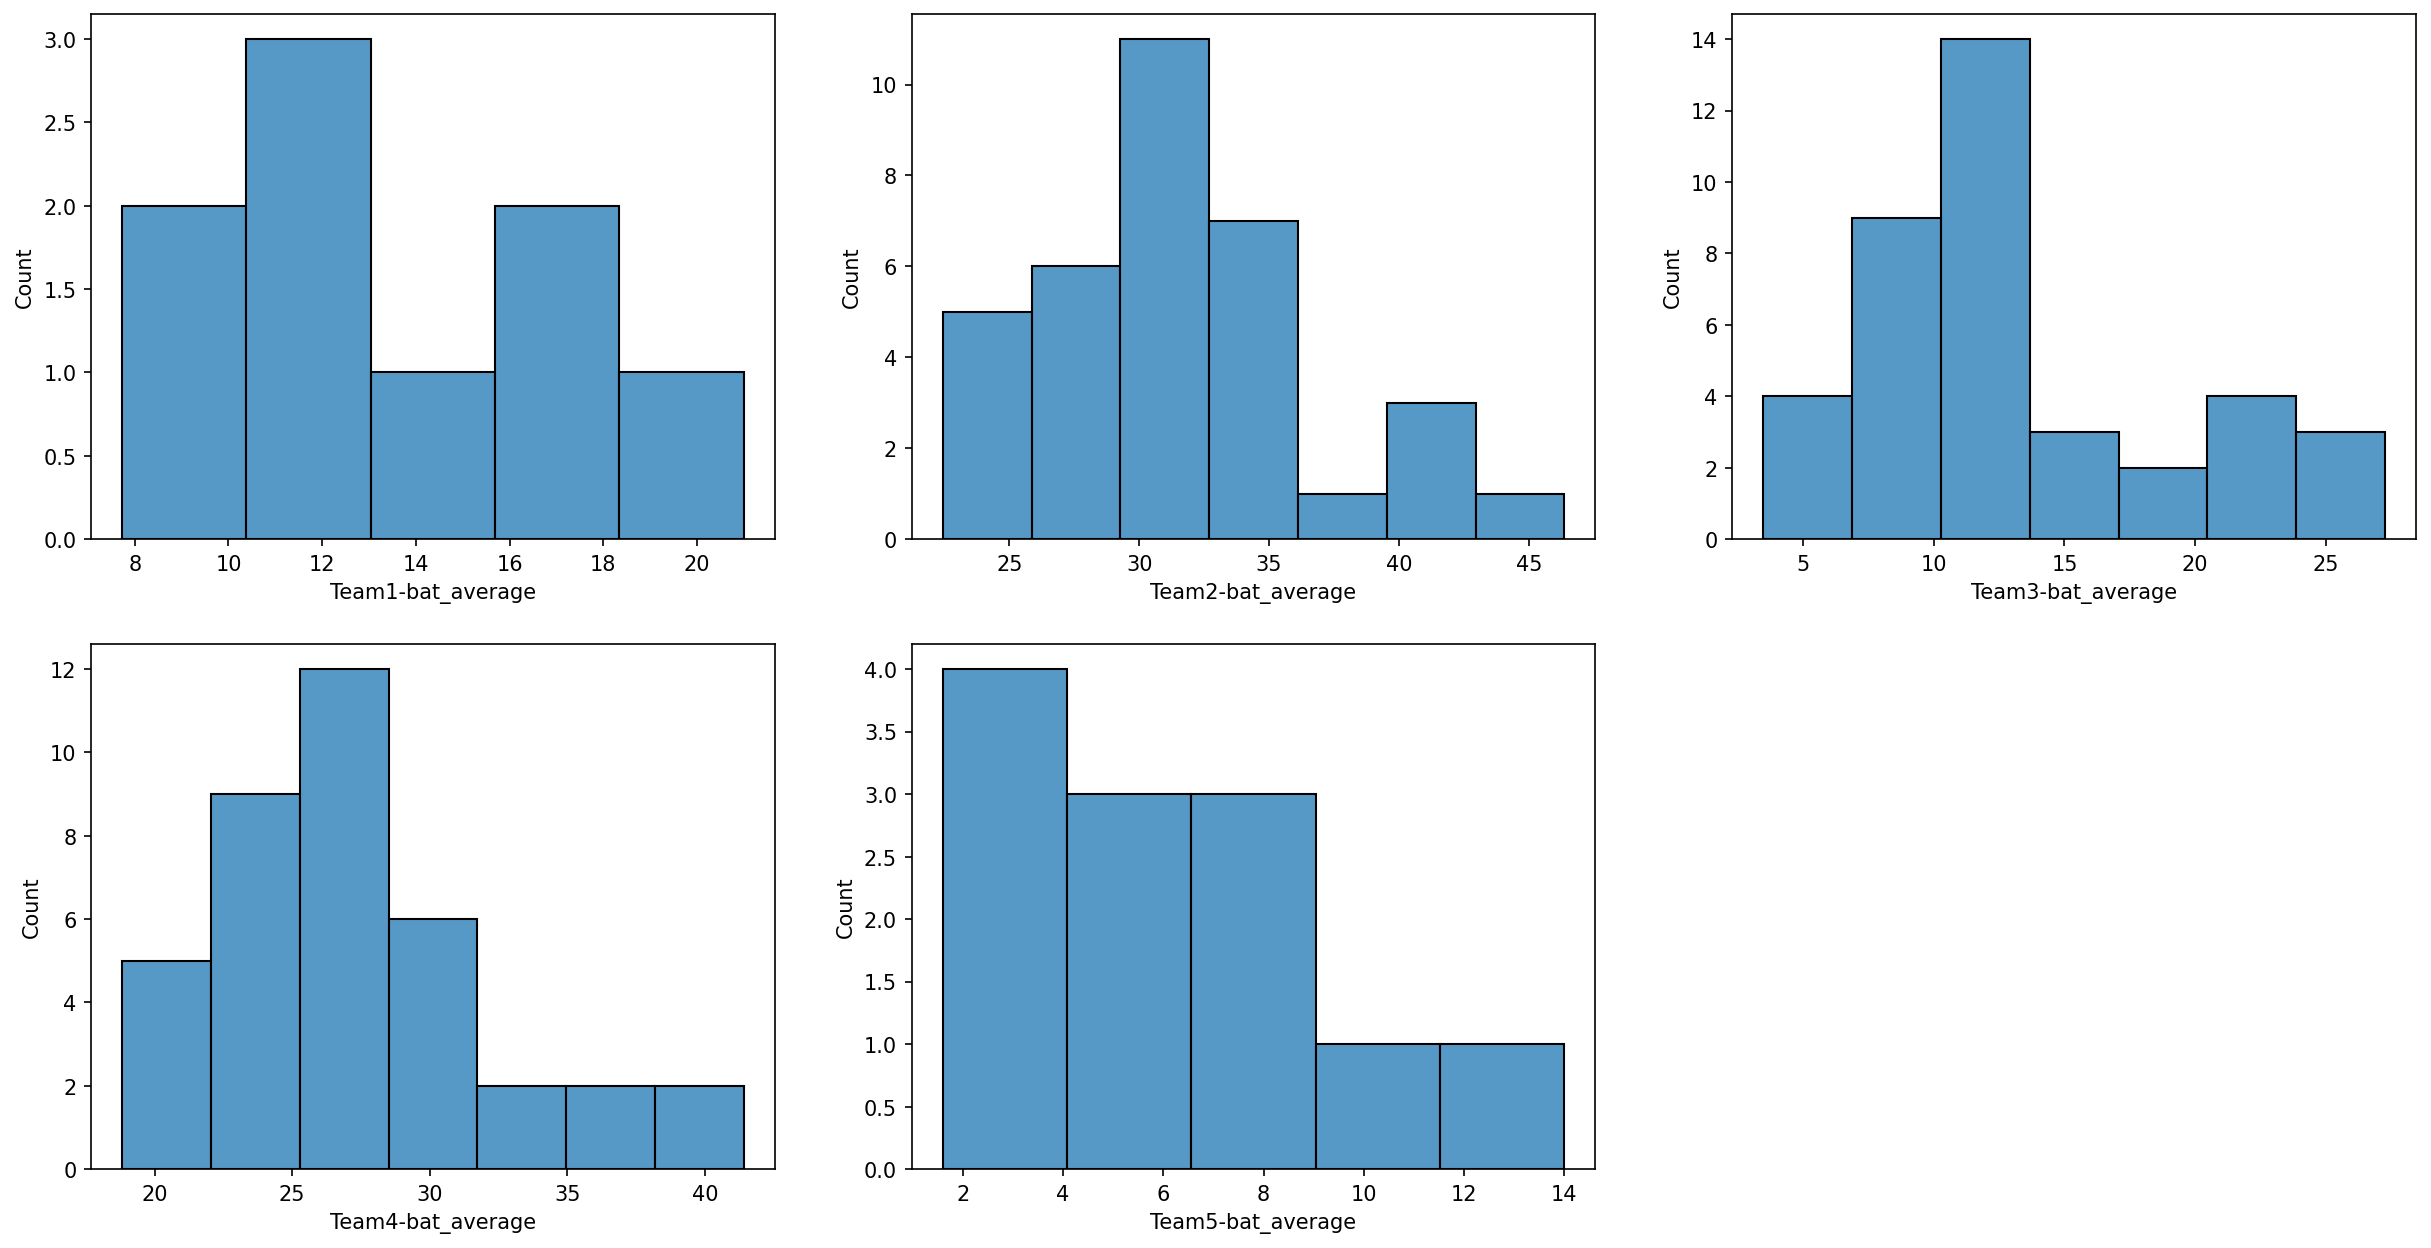

In [50]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bat_average'])
plt.xlabel('Team1-bat_average')

plt.subplot(2,3,2)
sns.histplot(teams2['bat_average'])
plt.xlabel('Team2-bat_average')

plt.subplot(2,3,3)
sns.histplot(teams3['bat_average'])
plt.xlabel('Team3-bat_average')

plt.subplot(2,3,4)
sns.histplot(teams4['bat_average'])
plt.xlabel('Team4-bat_average')

plt.subplot(2,3,5)
sns.histplot(teams5['bat_average'])
plt.xlabel('Team5-bat_average')

plt.show()

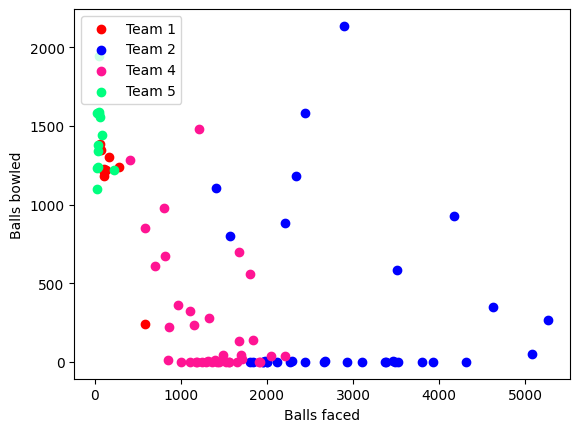

In [51]:
plt.xlabel('Balls faced')
plt.ylabel('Balls bowled')

plt.scatter(teams1['balls_faced'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['balls_faced'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['balls_faced'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['balls_faced'],teams5['balls_bowled'],color='springgreen')

plt.legend(['Team 1', 'Team 2', 'Team 4', 'Team 5'], loc='upper left')

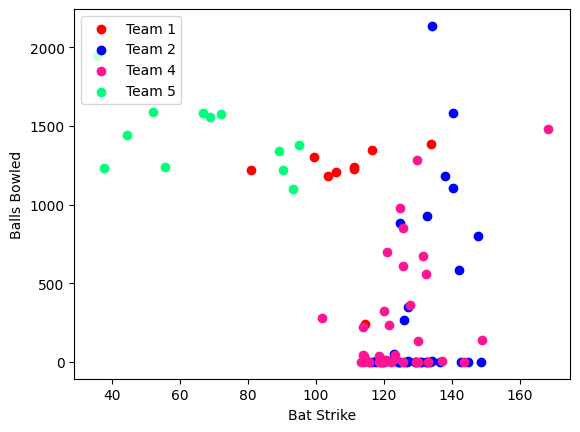

In [52]:
plt.xlabel('Bat Strike')
plt.ylabel('Balls Bowled')

plt.scatter(teams1['bat_strike'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['bat_strike'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['bat_strike'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['bat_strike'],teams5['balls_bowled'],color='springgreen')


plt.legend(['Team 1', 'Team 2', 'Team 4', 'Team 5'], loc='upper left')

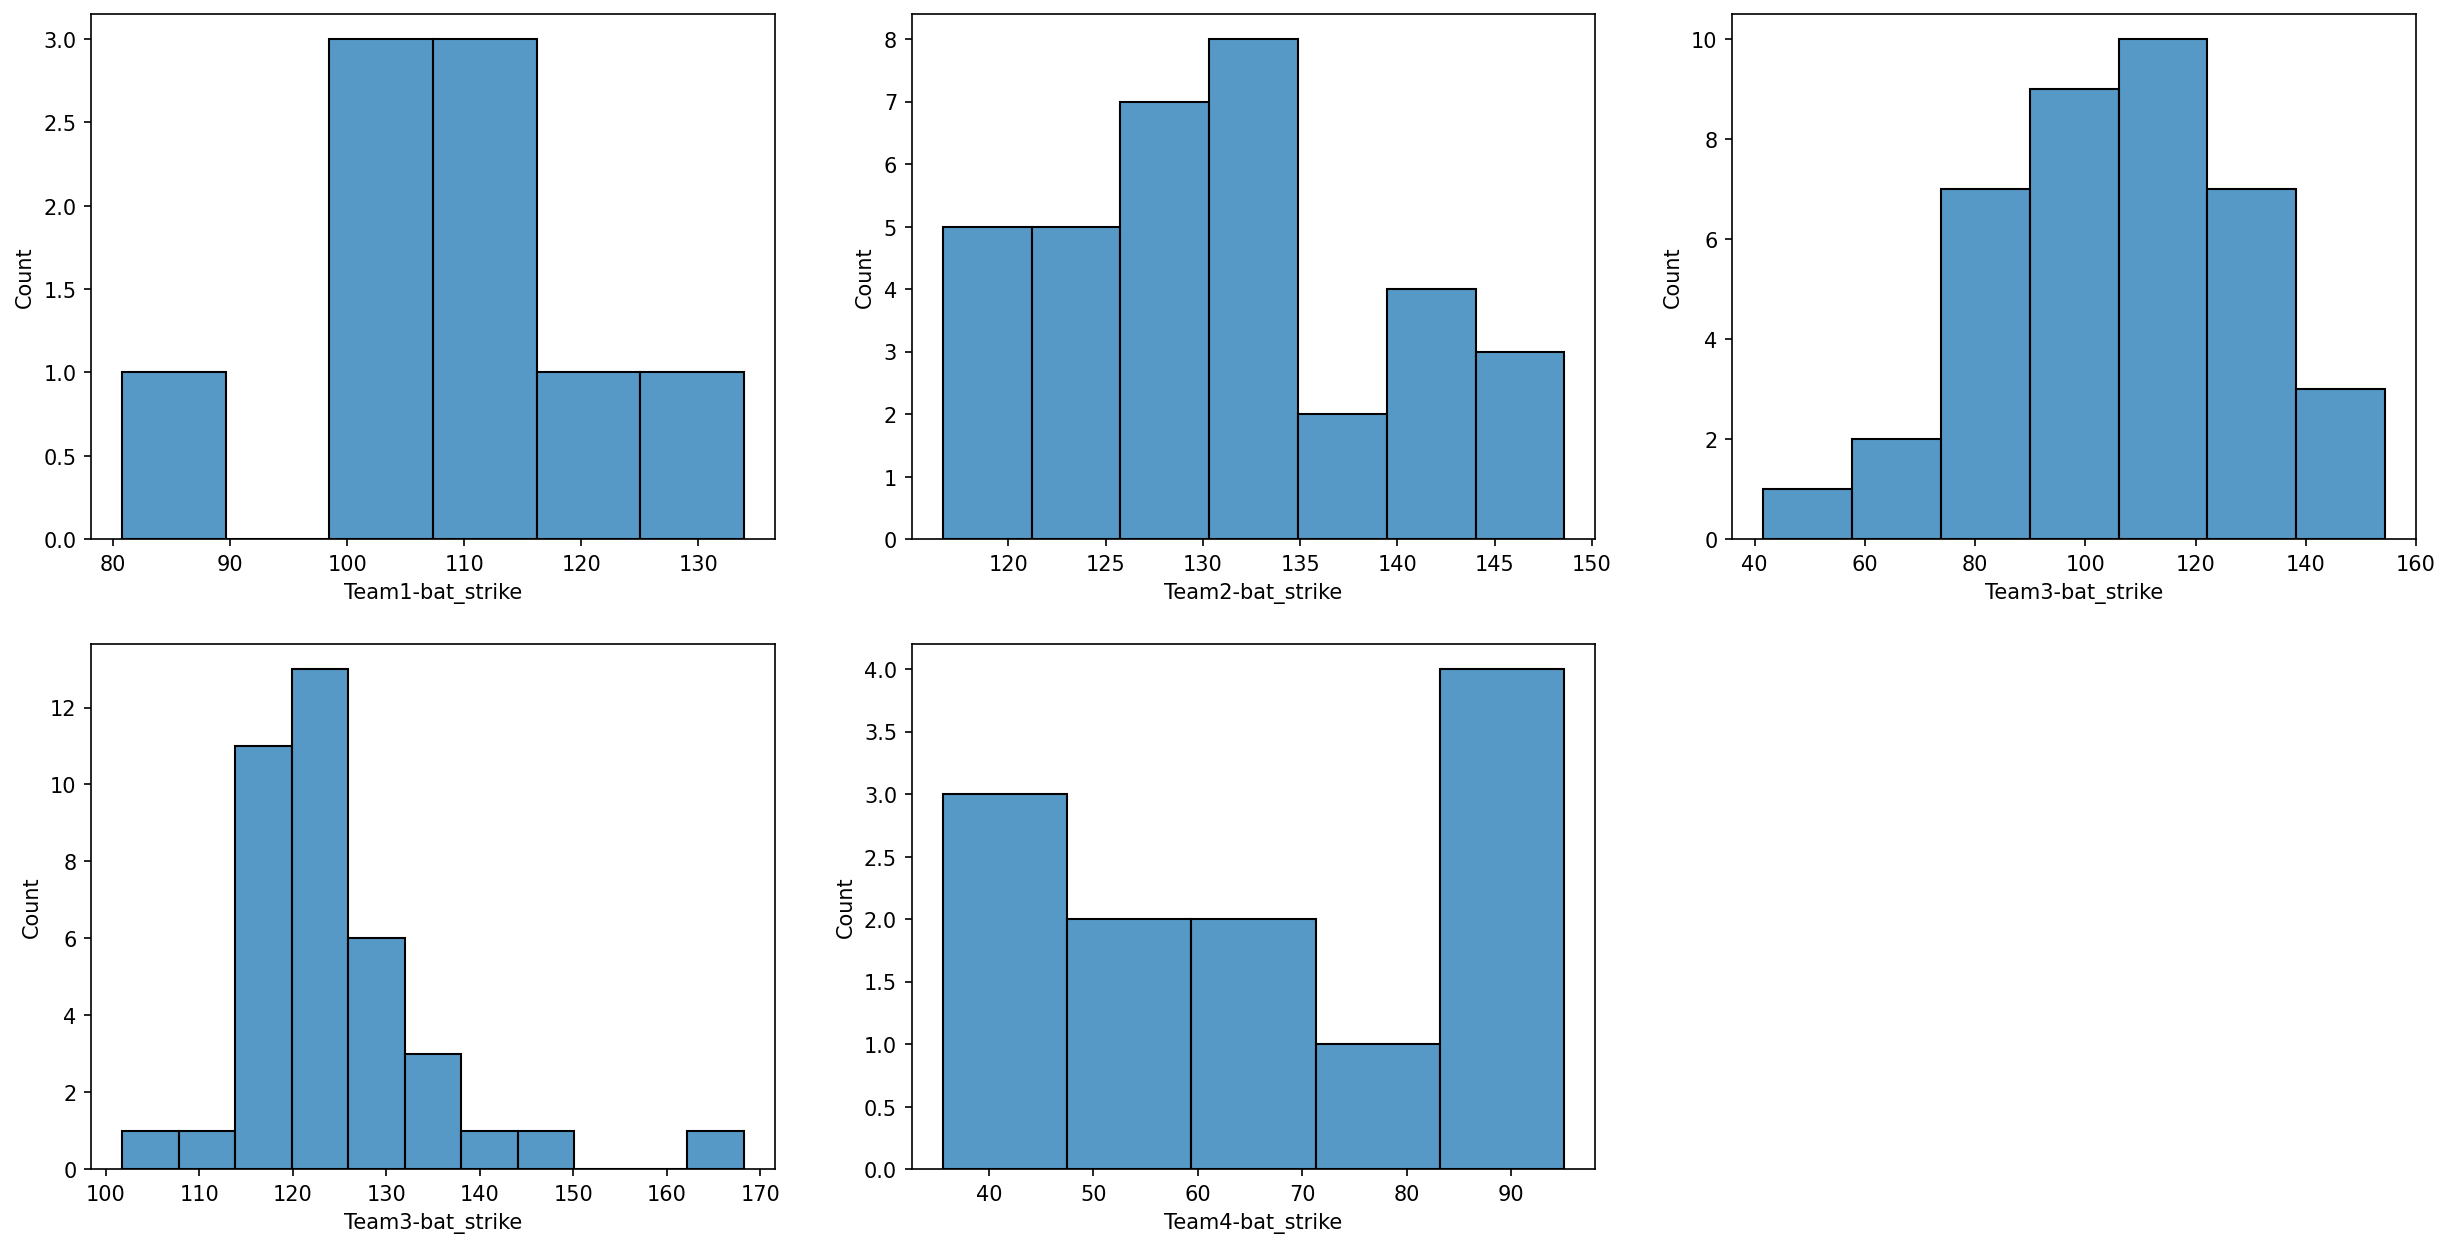

In [53]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bat_strike'])
plt.xlabel('Team1-bat_strike')

plt.subplot(2,3,2)
sns.histplot(teams2['bat_strike'])
plt.xlabel('Team2-bat_strike')

plt.subplot(2,3,3)
sns.histplot(teams3['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,4)
sns.histplot(teams4['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,5)
sns.histplot(teams5['bat_strike'])
plt.xlabel('Team4-bat_strike')

plt.show()

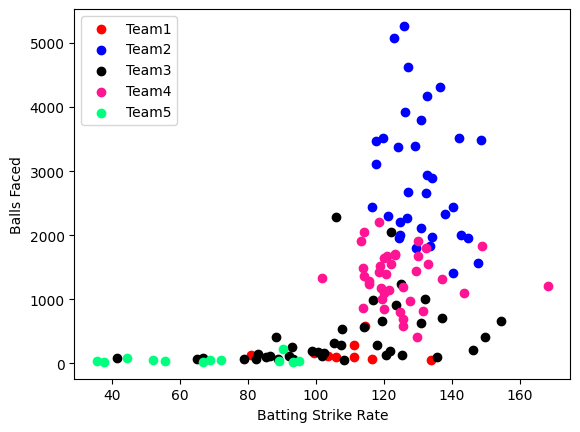

In [54]:
plt.xlabel('Batting Strike Rate')
plt.ylabel('Balls Faced')

plt.scatter(teams1['bat_strike'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_strike'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_strike'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_strike'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_strike'],teams5['balls_faced'],color='springgreen')

plt.legend(['Team1','Team2','Team3','Team4','Team5'],loc='upper left')

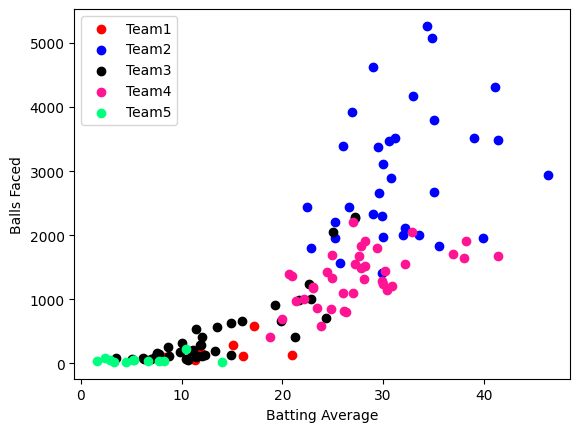

In [55]:
plt.xlabel('Batting Average')
plt.ylabel('Balls Faced')

plt.scatter(teams1['bat_average'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_average'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_average'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_average'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_average'],teams5['balls_faced'],color='springgreen')


plt.legend(['Team1','Team2','Team3','Team4','Team5'],loc='upper left')